<a href="https://colab.research.google.com/github/katerinbarrera21/Simulacion/blob/main/Evaluaci%C3%B3n/prueba1KB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fecha: 4/5/2022

En base a ello obtener lo siguiente:
Generar gráficas para entender y procesar los datos
*   Generar gráfico de barras de solo las empresas que han mejorado y/o
empeorado su ranking con respecto al año anterior.
* Generar gráfico de las empresas que tienen panamá papers.
* Generar un pie de las empresas que más aportan a la economía del país.
* Obtener las empresas que mayor patrimonio tienen (10).
* El proceso desarrollado deberá considerar los siguientes aspectos:
* Generar un cuaderno de Google Colabs para el desarrollo y parametrización de
gráficas y reportes.
* Generar un análisis y conclusiones de los datos y graficas obtenidas.
* Recomendaciones.
•Fechas de Presentación: 04/05/2022 – 11:00 Subir al Avac en formato PDF y link del Google
Colabs.
* Puntos Adicionales:
▪ Generar una regresión lineal del ingreso de las 5 principales empresas teniendo al
menos 10 años de datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/prueba
!ls

/content/drive/My Drive/Colab Notebooks/prueba
'Conformación de los Grupos Económicos y su Comportamiento Tributario (1).xlsx'
'Conformación de los Grupos Económicos y su Comportamiento Tributario (4) (1).xlsx.xlsx'
'Conformación de los Grupos Económicos y su Comportamiento Tributario.csv'


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

In [80]:
file_name = "Conformación de los Grupos Económicos y su Comportamiento Tributario (4) (1).xlsx" # File name
sheet_name = 0 # 4th sheet
header = 0 # The header is the 2nd row
df = pd.read_excel("Conformación de los Grupos Económicos y su Comportamiento Tributario (4) (1).xlsx", sheet_name = sheet_name, header = header)
(df.head()) # Prints first 5 rows from the top along with the header


,Unnamed: 0,Ranking Tamaño 2021,Ranking Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO GE,Nombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS,No. de Integrantes domiciliados en PARAÍSOS FISCALES,No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS,Personas Naturales,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019,Total Deuda Generada(9)
0,0,1,1,0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2,0,3,...,221893.35,3509949,3577970,18949015666,17928760492,3688293052,3699748891,588975950,667872172,NaN
1,1,2,2,0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45,42,17,...,4339679.14,796827,945874,6417335168,6436090837,1878733441,1955377497,127087663,190328750,NaN
2,2,3,3,0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4,5,20,...,1617777.87,0,0,3448646302,3343835273,2427005282,2314556018,144524011,139310219,NaN
3,3,4,5,1,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2,0,9,...,86918.43,4785739,5678838,6014463154,5334073117,784042300,791999072,206200661,234359513,NaN
4,4,5,4,-1,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8,0,0,...,237591.28,0,0,3286786210,3616608480,2426480097,2305837270,202204211,152342627,NaN


In [61]:
print("Existen valores nulos: ",df.isnull().values.any())

nan_rows = df[df.isnull().any(1)]
print(nan_rows)
df.columns[df.isnull().any()]
datasetCompleto = df.dropna(how='any')

print(datasetCompleto.isnull().sum())
print("--- Existen valores nulos: ",datasetCompleto.isnull().values.any())
print(datasetCompleto.isnull().sum().sum())

Existen valores nulos:  True
       3    4    5   1 Unnamed: 4  \
0      4    5    4  -1        NaN   
1      5    6    6   0        NaN   
2      6    7    7   0        NaN   
3      7    8    9   1        NaN   
4      8    9    8  -1        NaN   
..   ...  ...  ...  ..        ...   
293  297  298  283 -15          X   
294  298  299  285 -14        NaN   
295  299  300  294  -6          X   
296  300  301  301   0        NaN   
297  301  302  302   0        NaN   

    BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEICOMISO MERCANTIL DE ADMINISTRACION GLM, PROMOQUIL, FIDEICOMISO MERCANTIL DE ADMINISTRACION MELM)  \
0    SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...                                                                                               
1    PRODUBANCO (SERVIPAGOS, PROTRAMITES TRAMITES P...                                                                                               
2    OCP ECUADOR (ANDES PETROLEUM, CONSORCIO B-16, ...                      

In [68]:
print(df.shape)
print("nulos: ",df.isnull().values.any())

(298, 41)
nulos:  True


In [69]:
columns_names = df.columns.values
columns_names

array([3, 4, 5, 1, 'Unnamed: 4',
       'BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEICOMISO MERCANTIL DE ADMINISTRACION GLM, PROMOQUIL, FIDEICOMISO MERCANTIL DE ADMINISTRACION MELM)',
       'SI', 2, 0, 9, '0.1', 57, '2.1', '1.1', '1.2', '1.3', '1.4', 66,
       102, 34, -68, 11527263, 681503379, 0.01691446198977687, 31755533,
       601613380, 0.05278395404038388, 0.1327929225909171,
       -0.6369998576311096, -0.03586949205060701, 1399735.47,
       86918.43000000001, 4785739, 5678838, 6014463154, 5334073117,
       784042300, 791999072, 206200661, 234359513, 'Unnamed: 40'],
      dtype=object)

In [70]:
df.columns = columns_names

In [65]:
columns_names = ['Ranking Tamaño  2021', 'Ranking Tamaño  2020',
       'Variación Ranking Tamaño 2020 - 2021', 'NUEVO GE',
       'Nombre Grupo Económico',
       'Reporta sus BENEFICIARIOS EFECTIVOS',
       'No. de Integrantes domiciliados en PARAÍSOS FISCALES',
       'No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS',
       'Personas Naturales', 'Personas Extranjeras',
       'Sociedades Nacionales', 'Sociedades Extranjeras',
       'Contribuyentes Especiales',
       'Grandes Contribuyentes e Importancia Recaudatoria',
       'Instituciones Financieras', 'Medios de Comunicación',
       'Total Integrantes e=a+b+c+d', 'Ranking Contribución I.R. 2020',
       'Ranking Contribución I.R. 2019',
       'Variación Ranking Contribución I.R. 2019-2020',
       'Impuesto a la Renta Causado (4) 2020', 'Total Ingresos 2020',
       'Contribución   I.R. 2020', 'Impuesto a la Renta Causado (4) 2019',
       'Total Ingresos 2019', 'Contribución   I.R. 2019',
       'Variación Ingresos', 'Variación Impuesto a la Renta Causado',
       'Variación Contribución  I.R. (2020-2019)',
       'Impuesto Causado ISD 2020', 'Impuesto Causado ISD 2019',
       'Impuesto Causado IAE 2020 (5)', 'Impuesto Causado IAE 2019 (5)',
       'Total Activo (6) 2020', 'Total Activo (6) 2019',
       'Total Patrimonio (7) 2020', 'Total Patrimonio (7) 2019',
       'Total Recaudado (8) 2020', 'Total Recaudado (8) 2019',
       'Total Deuda Generada(9)']

In [71]:
df.columns = columns_names

In [72]:
columns_names = df.columns.values
columns_names

array([3, 4, 5, 1, 'Unnamed: 4',
       'BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEICOMISO MERCANTIL DE ADMINISTRACION GLM, PROMOQUIL, FIDEICOMISO MERCANTIL DE ADMINISTRACION MELM)',
       'SI', 2, 0, 9, '0.1', 57, '2.1', '1.1', '1.2', '1.3', '1.4', 66,
       102, 34, -68, 11527263, 681503379, 0.01691446198977687, 31755533,
       601613380, 0.05278395404038388, 0.1327929225909171,
       -0.6369998576311096, -0.03586949205060701, 1399735.47,
       86918.43000000001, 4785739, 5678838, 6014463154, 5334073117,
       784042300, 791999072, 206200661, 234359513, 'Unnamed: 40'],
      dtype=object)

Generar gráfico de barras de solo las empresas que han mejorado y/o empeorado su ranking con respecto al año anterior.

In [81]:
print("Empresas: ")
print(df['Ranking Tamaño  2021'].unique())

Empresas: 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

<Figure size 432x288 with 0 Axes>

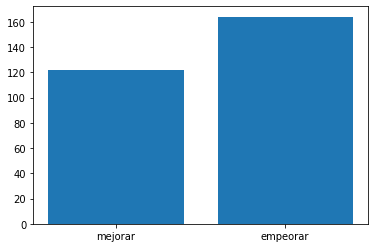

In [93]:
mejor = df.loc[(df['Variación Ranking Tamaño 2020 - 2021'] < 0)].count()[0]
peor = df.loc[(df['Variación Ranking Tamaño 2020 - 2021'] > 0)].count()[0]

plt.figure()
nombre = ['mejorar', 'empeorar']
datos = [mejor, peor]
print("\n")
plt.figure()
barras = plt.bar(nombre, datos)


Generar gráfico de las empresas que tienen panamá papers.

Con PP:  58
Sin PP:  244




<Figure size 432x288 with 0 Axes>

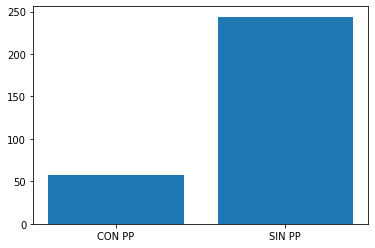

In [100]:
tienePP = df.loc[(df['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS'] > 0)].count()[0]
notienePP = df.loc[(df['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS'] <= 0)].count()[0] 
print("Con PP: ", tienePP)
print("Sin PP: ", notienePP)

plt.figure()
nombre = ['CON PP', 'SIN PP']
datos = [tienePP, notienePP]
print("\n")
plt.figure()
barras = plt.bar(nombre, datos)


Generar un pie de las empresas que más aportan a la economía del país

In [162]:
dfcontri = df[["Nombre Grupo Económico","Variación Ranking Contribución I.R. 2019-2020"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


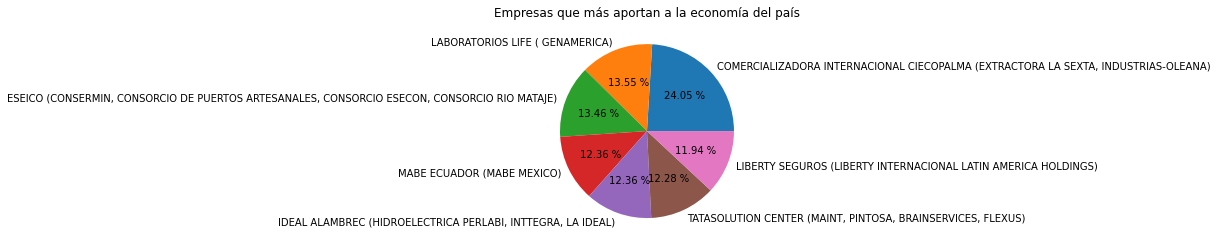

In [166]:
dfcontri ['contribucion'] = dfcontri[['Variación Ranking Contribución I.R. 2019-2020']].rank()
dfmayoraport =dfcontri.nlargest(7, ['contribucion']) 
dfmayoraport
nombre = dfmayoraport['Nombre Grupo Económico'].tolist()
valor = dfmayoraport['Variación Ranking Contribución I.R. 2019-2020'].tolist()

plt.pie(valor, labels=nombre, autopct='%.2f %%')
plt.title('Empresas que más aportan a la economía del país')
plt.show()


Obtener las empresas que mayor patrimonio tienen (10).

In [171]:
topEmp = df[["Nombre Grupo Económico","Total Patrimonio (7) 2020", 'Total Patrimonio (7) 2019']]
topEmp['sum'] = topEmp.loc[topEmp['Total Patrimonio (7) 2020'] >= 0,['Total Patrimonio (7) 2020','Total Patrimonio (7) 2019']].sum(axis=1)
topEmp['sum'] = topEmp['sum'].div(2)
topEmp

topEmp['default_rank'] = topEmp['sum'].rank()
topEmp

print("Importancia: ")
topEmp.nlargest(10, ['default_rank']) 

Importancia: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Nombre Grupo Económico,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,sum,default_rank
0,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",3688293052,3699748891,3.694021e+09,298.0
2,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",2427005282,2314556018,2.370781e+09,297.0
4,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,2426480097,2305837270,2.366159e+09,296.0
1,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",1878733441,1955377497,1.917055e+09,295.0
6,"OCP ECUADOR (ANDES PETROLEUM, CONSORCIO B-16, ...",1282070968,1455499361,1.368785e+09,294.0
13,"INDUSTRIAL PESQUERA SANTA PRISCILA (MANESIL, P...",893743494,825092502,8.594180e+08,293.0
3,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",784042300,791999072,7.880207e+08,292.0
20,"CONSTRUCTORA HIDALGO E HIDALGO (CONCEGUA, CONO...",815559783,733693093,7.746264e+08,291.0
35,"HERDOIZA CRESPO CONSTRUCCIONES (CANEYBI, PANAV...",670485963,650809388,6.606477e+08,290.0
14,"KFC (INT FOOD SERVICES CORP, AVÍCOLA SAN ISIDR...",640964656,657609211,6.492869e+08,289.0


Generar un análisis y conclusiones de los datos y graficas obtenidas.

1. Gráfica 1 

La diferencia existente entre las empresas que mejorar y empeoraron son de 40. Aumentando el número de empresas que empeoraron el periodo de 2020 2021 y las que se mantuvieron en el raking de mejora fueron un total de 120 empresas.
2. Gráfica 2

El gráfico presentado representa las empresas que cuentan con panamá pepers siendo un total de 58 mientras aquellas que no cuentan se presentan con mayor frencuencia siendo 244 empresas en total.

3. Grafica 3 

En la gráfica 3 se observa que la comercializadora internacional CIECOPALMA es la empresa con tiene mayor aportación a la economía siendo casi el doble de aportación en comparación entre las demás empresas. Se observa que las empresas siguientes están en un rango de 13 a 11 % de aportación para la economía del país. 

4. Gráfica 4 

Las empresas con mayor patrimonio son banco del Pichincha, posterior a ellos la corporación favorita que cuenta con comercial kiwi, sukasa, etc y schlumberger del Ecuador, entre otras. Por lo que están empresas tienen mayor concentración en la seguridad de sus datos y sus activos


Recomendación 

1. En cuanto a la segunda grafica en referencia a las empresas que tienen Panamá Papers es necesario realizar un estudio de cuáles son las 58 empresas que son integrantes de empresas offshore relacionadas y cuáles son las consecuencias que tuvieron las empresas mencionadas referentes al patrimonio que presentaron en el país

